<a href="https://colab.research.google.com/github/KaterynaSiniuta/DataMath/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Підключаємо Google Drive з датасетами
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Імпортуємо бібліотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

%config InlineBackend.figure_format = "png"

In [3]:
# зчитуємо набір даних
datasets_path = "/content/drive/MyDrive/Colab Notebooks/south+german+credit+update/"
df = pd.read_csv(datasets_path + "SouthGermanCredit.asc", sep=" ")

df.head()

laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2     2      1   

   gastarb  kredit  
0        2       1  
1        2       1  
2        2       1  
3        1       1  
4        1       1  

[5 rows x 21 columns]

In [4]:
pip install clustergram

In [5]:
df = df.rename(
    columns={
        "laufkont": "status",
        "laufzeit": "duration",
        "moral": "credit_history",
        "verw": "purpose",
        "hoehe": "amount",
        "sparkont": "savings",
        "beszeit": "employment_duration",
        "rate": "installment_rate",
        "famges": "personal_status_sex",
        "buerge": "other_debtors",
        "wohnzeit": "present_residence",
        "verm": "property",
        "alter": "age",
        "weitkred": "other_installment_plans",
        "wohn": "housing",
        "bishkred": "number_credits",
        "beruf": "job",
        "pers": "people_liable",
        "telef": "telephone",
        "gastarb": "foreign_worker",
        "kredit": "credit_risk",
    }
)

In [6]:
df.head()

status  duration  credit_history  purpose  amount  savings  \
0       1        18               4        2    1049        1   
1       1         9               4        0    2799        1   
2       2        12               2        9     841        2   
3       1        12               4        0    2122        1   
4       1        12               4        0    2171        1   

   employment_duration  installment_rate  personal_status_sex  other_debtors  \
0                    2                 4                    2              1   
1                    3                 2                    3              1   
2                    4                 2                    2              1   
3                    3                 3                    3              1   
4                    3                 4                    3              1   

   ...  property  age  other_installment_plans  housing  number_credits  job  \
0  ...         2   21                        3        1               1    3   
1  ...         1   36                        3        1               2    3   
2  ...         1   23                        3        1               1    2   
3  ...         1   39                        3        1               2    2   
4  ...         2   38                        1        2               2    2   

   people_liable  telephone  foreign_worker  credit_risk  
0              2          1               2            1  
1              1          1               2            1  
2              2          1               2            1  
3              1          1               1            1  
4              2          1               1            1  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

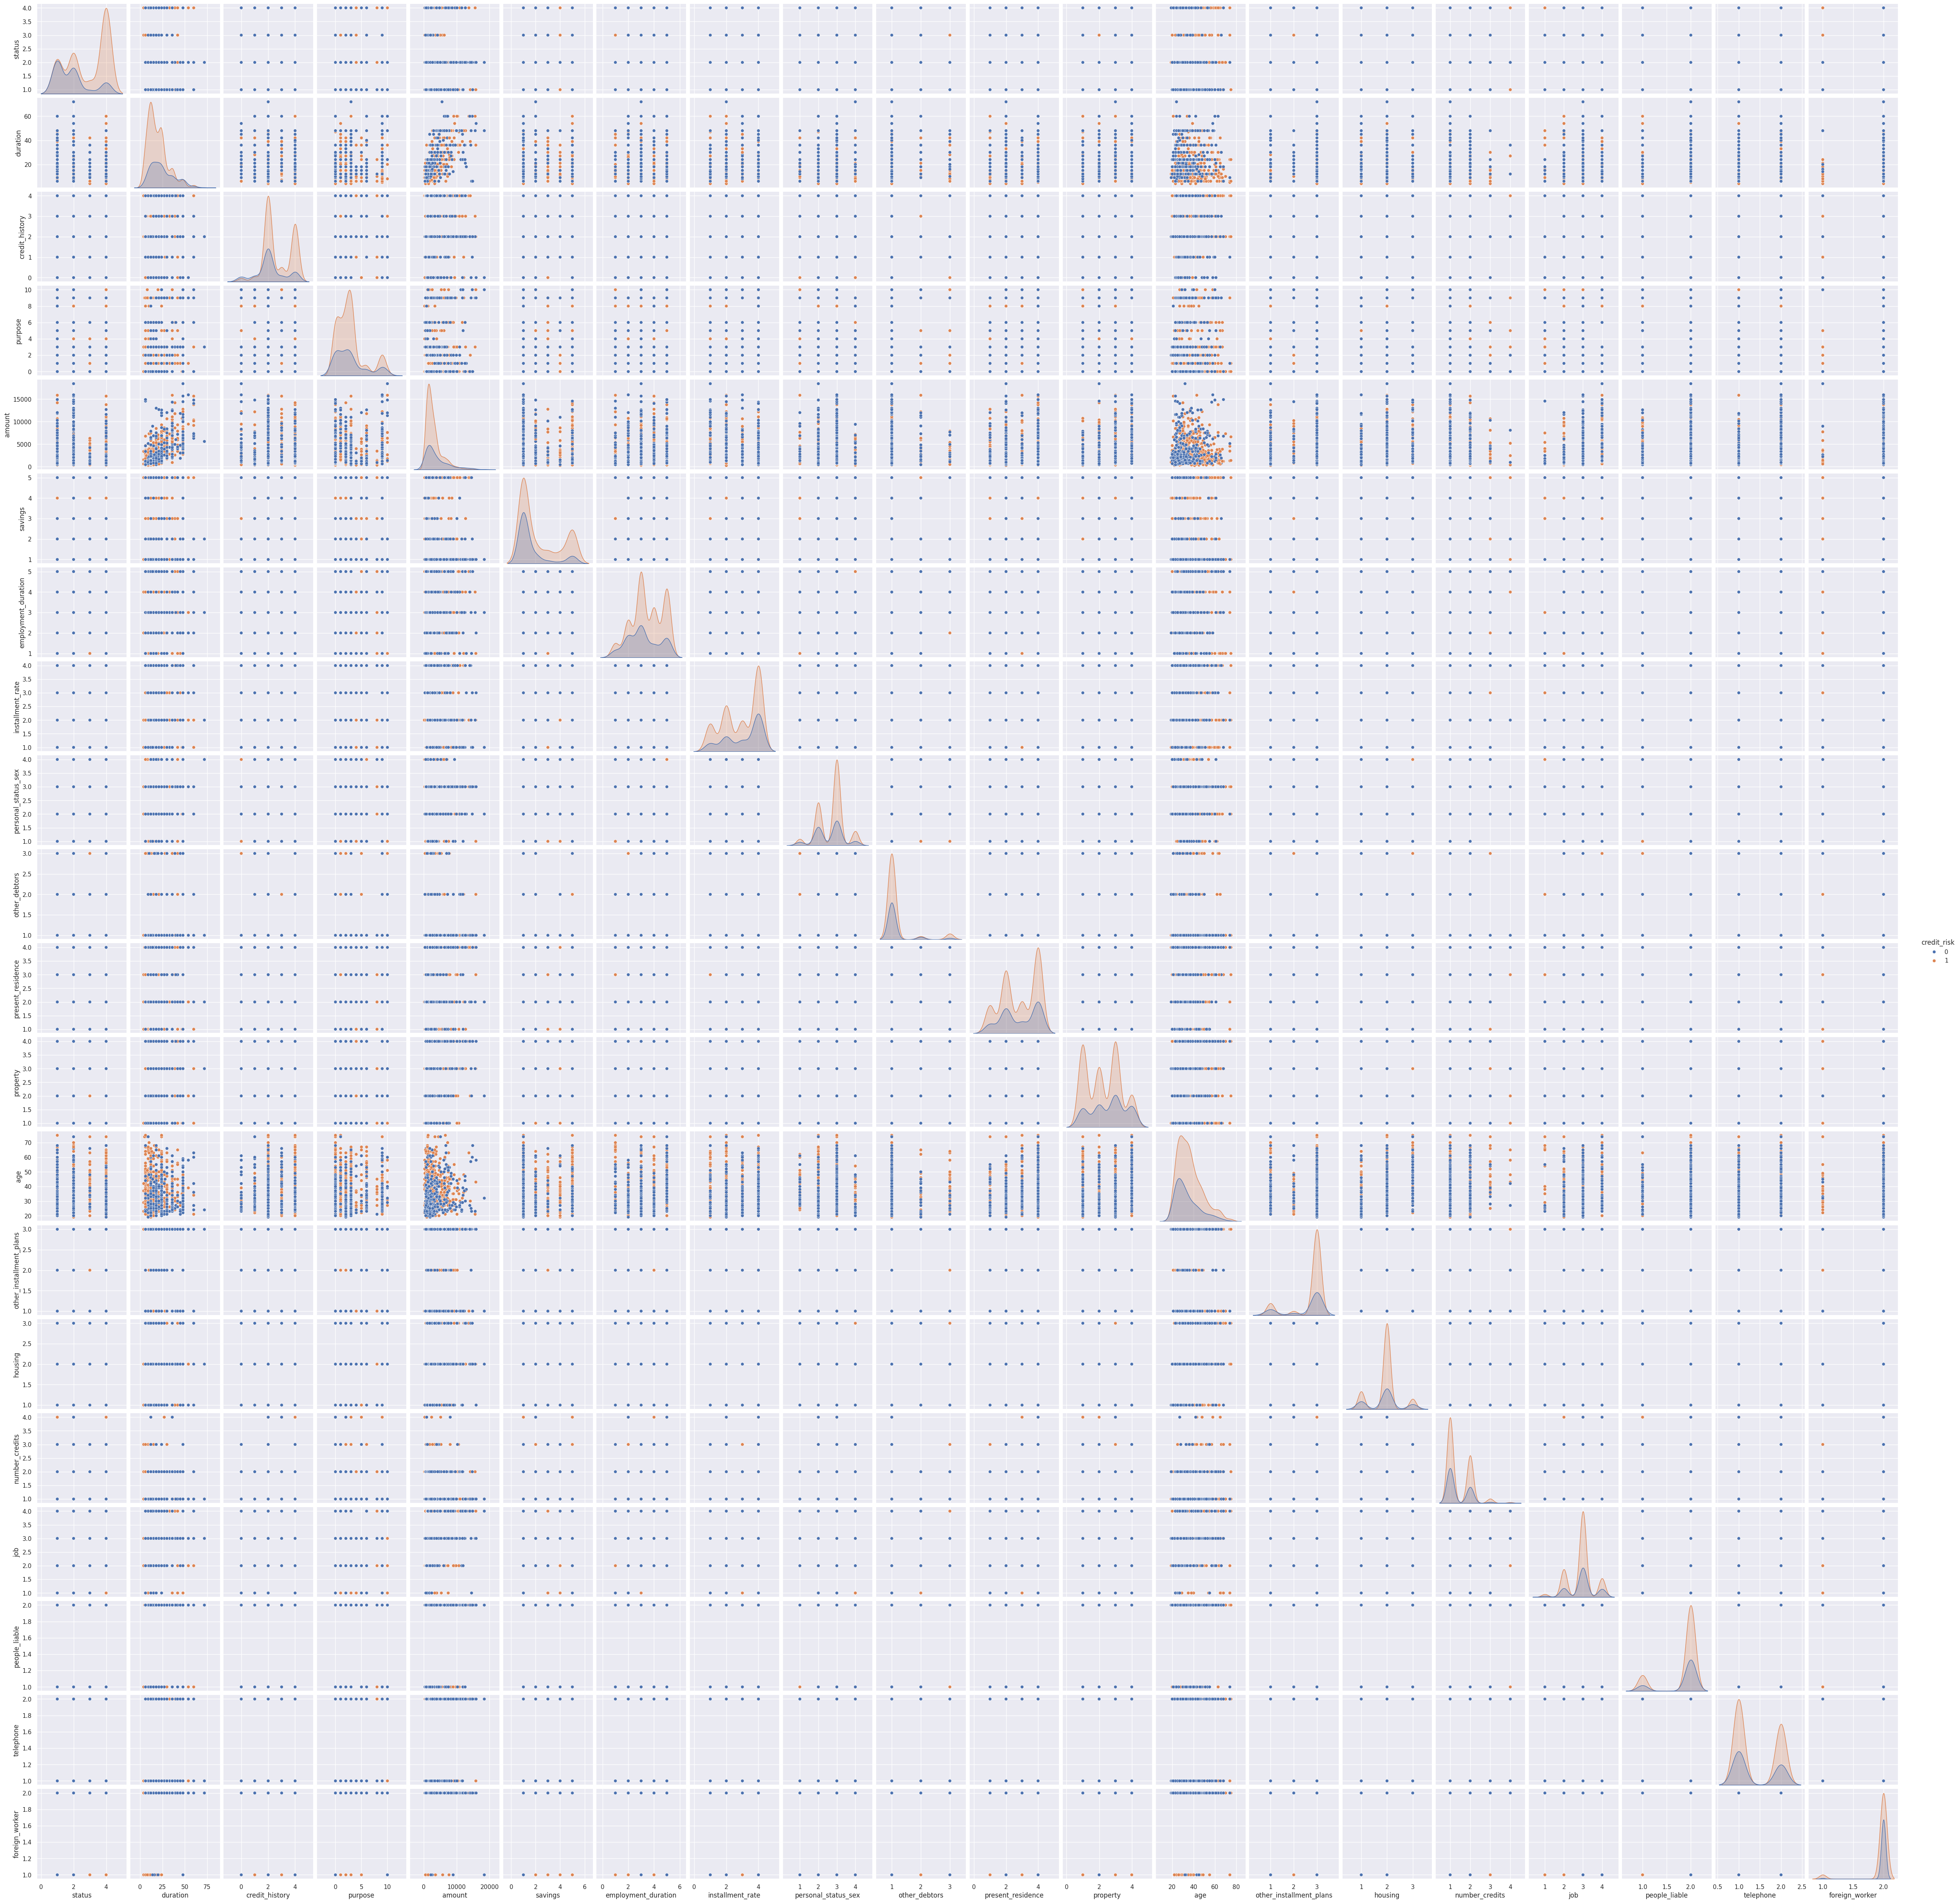

In [8]:
# Побудуємо pairplot щоб побачити кореляцію фічей
sns.pairplot(df, hue="credit_risk");

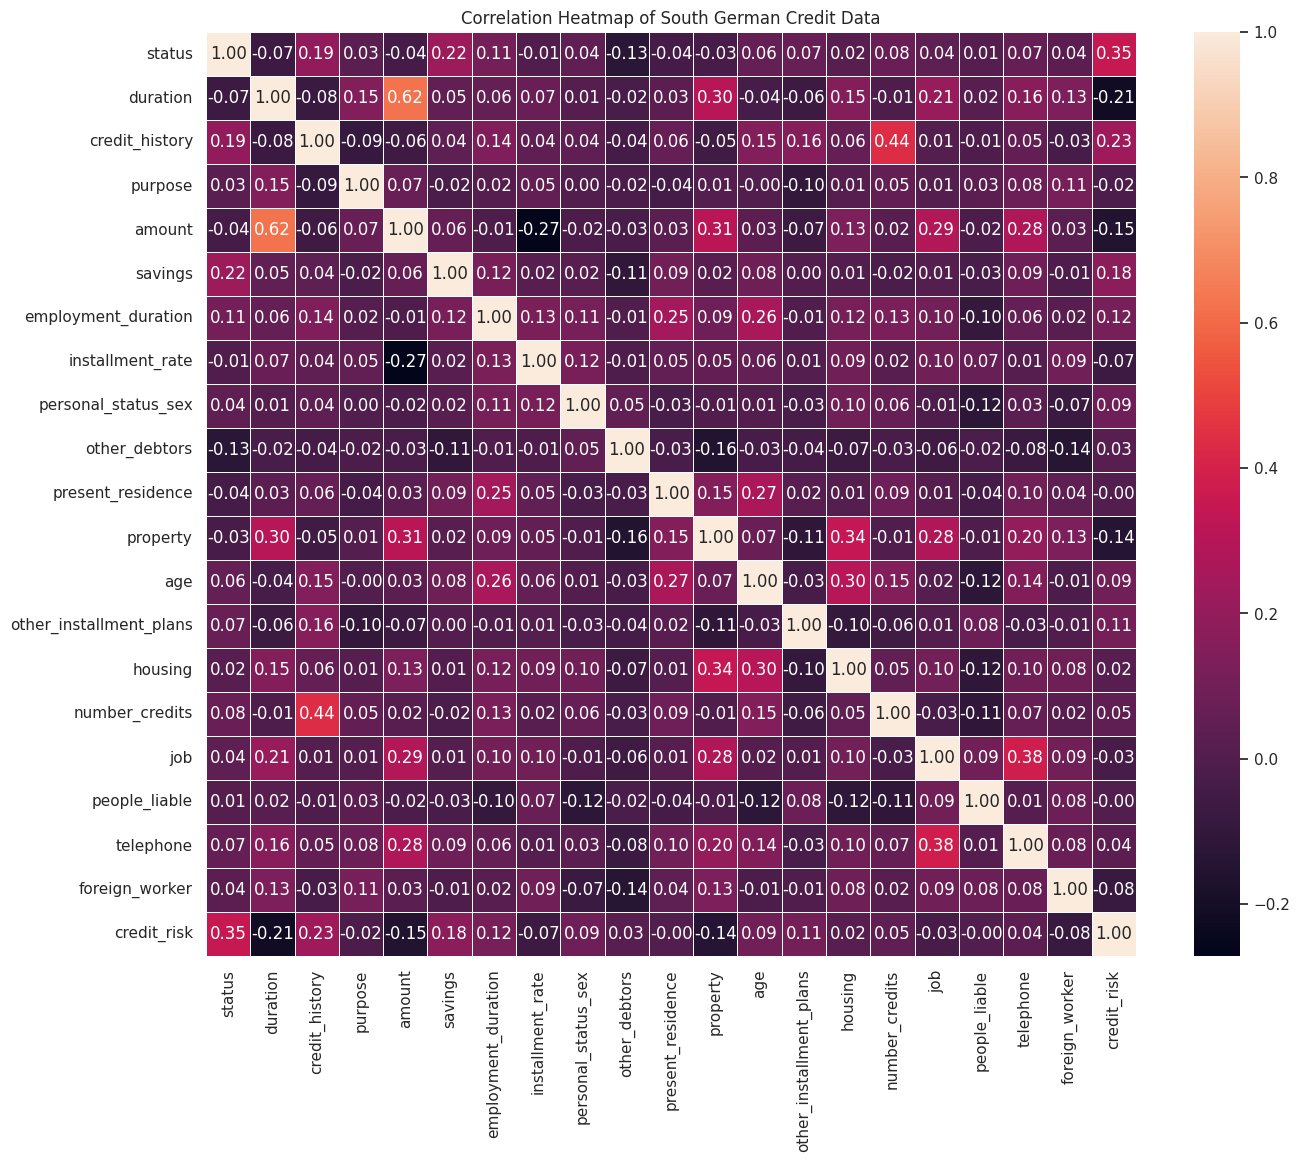

In [9]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of South German Credit Data')
plt.show()


фічі між собою майже не корелюють, найбільша кореляція ж ризиком - статус. також з найбільших кореляцій це кількість кредитів та кредитна історія, це є логічним.

In [10]:
#змаштабуємо фічі
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [11]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, Birch
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

max_clusters_num = 4

In [12]:
# KMeans
for k in range(2, max_clusters_num + 1):
  kmeans = KMeans(
      n_clusters=k,
      random_state=42,
      n_init="auto",
  ).fit(X)
  print(f"Number of clusters: {k}")
  print(f"Davies-Bouldin score: {davies_bouldin_score(X, kmeans.labels_)}")
  print(f"Calinski and Harabasz score: {calinski_harabasz_score(X, kmeans.labels_)}")
  print(f"Silhouette score: {silhouette_score(X, kmeans.labels_)}", "\n")

Number of clusters: 2
Davies-Bouldin score: 2.4274600115353127
Calinski and Harabasz score: 136.81622107473058
Silhouette score: 0.13817478668524677 

Number of clusters: 3
Davies-Bouldin score: 2.290636488942323
Calinski and Harabasz score: 133.02063069595636
Silhouette score: 0.13113422820632303 

Number of clusters: 4
Davies-Bouldin score: 2.5770230578989093
Calinski and Harabasz score: 89.66672923315136
Silhouette score: 0.08806236284022079 



K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.006 seconds.
K=3 fitted in 0.006 seconds.
K=4 fitted in 0.004 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

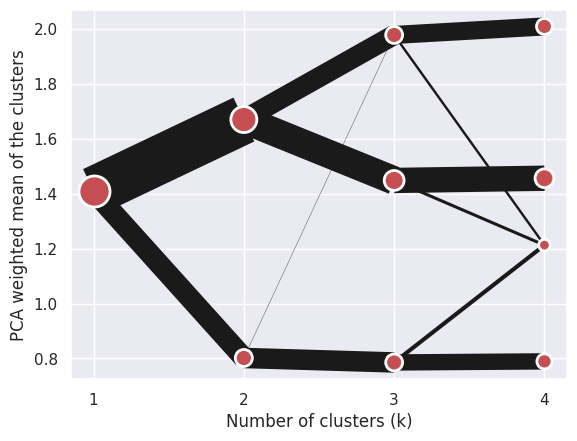

In [13]:
from clustergram import Clustergram

cgram = Clustergram(range(1, max_clusters_num + 1))
cgram.fit(X)
cgram.plot()


К means поділив на 2 кластери - видати та не видати кредит. При більшій кількості кластерів починають перетинатися

In [14]:
# AffinityPropagation
aff_prop = AffinityPropagation(random_state=42).fit(X)
print(f"Clusters labels: {np.unique(aff_prop.labels_)}")
print(f"Davies-Bouldin score: {davies_bouldin_score(X, aff_prop.labels_)}")
print(f"Calinski and Harabasz score: {calinski_harabasz_score(X, aff_prop.labels_)}")
print(f"Silhouette score: {silhouette_score(X, aff_prop.labels_)}", "\n")

Clusters labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
Davies-Bouldin score: 1.9578612745621695
Calinski and Harabasz score: 20.687551945385277
Silhouette score: 0.08753060628746205 



AffinityPropagation нарахував занадто багато кластерів для нашої задачі


In [15]:
# MeanShift
ms = MeanShift(bandwidth=2).fit(X)
labels = np.unique(ms.labels_)

print(f"Clusters labels: {labels}")

if len(labels) > 1:
  print(f"Davies-Bouldin score: {davies_bouldin_score(X, ms.labels_)}")
  print(f"Calinski and Harabasz score: {calinski_harabasz_score(X, ms.labels_)}")
  print(f"Silhouette score: {silhouette_score(X, ms.labels_)}", "\n")

Clusters labels: [0]


Meanshift не знайшов кластерів

In [16]:
# SpectralClustering
for k in range(2, max_clusters_num + 1):
  kmeans = SpectralClustering(
      n_clusters=k,
      random_state=42,
  ).fit(X)
  print(f"Number of clusters: {k}")
  print(f"Davies-Bouldin score: {davies_bouldin_score(X, kmeans.labels_)}")
  print(f"Calinski and Harabasz score: {calinski_harabasz_score(X, kmeans.labels_)}")
  print(f"Silhouette score: {silhouette_score(X, kmeans.labels_)}", "\n")

Number of clusters: 2
Davies-Bouldin score: 2.817207670311166
Calinski and Harabasz score: 118.15033107121256
Silhouette score: 0.109627957285817 

Number of clusters: 3
Davies-Bouldin score: 2.3101929180203853
Calinski and Harabasz score: 130.1840911664893
Silhouette score: 0.12909395862829648 

Number of clusters: 4
Davies-Bouldin score: 2.3464800550323774
Calinski and Harabasz score: 100.39678289295739
Silhouette score: 0.10520078527363563 



Spectralclustering знайшов три, що скоріш за все - дати кредит, можливо дати, неможливо

In [17]:
# AgglomerativeClustering
for k in range(2, max_clusters_num + 1):
  agg = AgglomerativeClustering(n_clusters=k).fit(X)
  print(f"Number of clusters: {k}")
  print(f"Davies-Bouldin score: {davies_bouldin_score(X, agg.labels_)}")
  print(f"Calinski and Harabasz score: {calinski_harabasz_score(X, agg.labels_)}")
  print(f"Silhouette score: {silhouette_score(X, agg.labels_)}", "\n")

Number of clusters: 2
Davies-Bouldin score: 2.5770820950245676
Calinski and Harabasz score: 116.46211060759755
Silhouette score: 0.12019719689133404 

Number of clusters: 3
Davies-Bouldin score: 2.552211206440942
Calinski and Harabasz score: 110.06919066407676
Silhouette score: 0.10968776946851262 

Number of clusters: 4
Davies-Bouldin score: 2.328920552764004
Calinski and Harabasz score: 92.8341853076966
Silhouette score: 0.11389706847530857 



те ж саме, дати чи ні

In [18]:
# DBSCAN
for i in range(1, max_clusters_num):
  dbs = DBSCAN(eps=i, min_samples=2).fit(X)
  labels = np.unique(dbs.labels_)

  print(f"Epsilon value: {i}")
  print(f"Clusters labels: {labels}")

  if len(labels) > 1:
    print(f"Davies-Bouldin score: {davies_bouldin_score(X, dbs.labels_)}")
    print(f"Calinski and Harabasz score: {calinski_harabasz_score(X, dbs.labels_)}")
    print(f"Silhouette score: {silhouette_score(X, dbs.labels_)}", "\n")

Epsilon value: 1
Clusters labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35]
Davies-Bouldin score: 1.6288277213607578
Calinski and Harabasz score: 12.993299531612243
Silhouette score: -0.016309084547546794 

Epsilon value: 2
Clusters labels: [0]
Epsilon value: 3
Clusters labels: [0]


занадто багато кластерів для нашої задачі

In [19]:
# t-SNE
from sklearn.manifold import TSNE
x_2d = TSNE(n_components=2, random_state=42).fit_transform(X)


[Text(0.5, 1.0, 'T-SNE projection')]

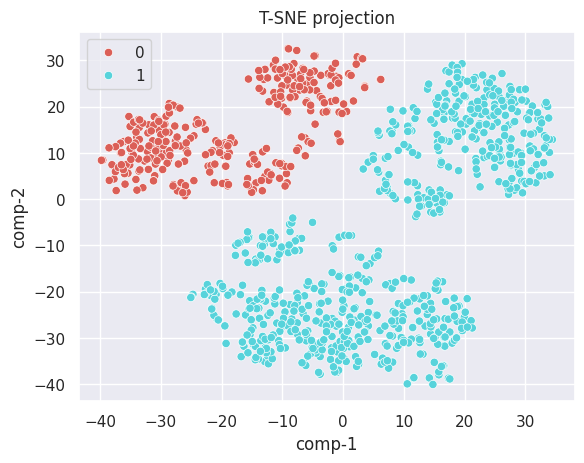

In [20]:

# Візуалізація
df_tsne = pd.DataFrame()
df_tsne["y"] = df["credit_risk"]
df_tsne["comp-1"] = x_2d[:, 0]
df_tsne["comp-2"] = x_2d[:, 1]

sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df_tsne.y.tolist(),
    palette=sns.color_palette("hls", 2),
    data=df_tsne
).set(title="T-SNE projection")

візуально можна поділити на три кластери, але ділить як і більшість моделей кластеризації на 2

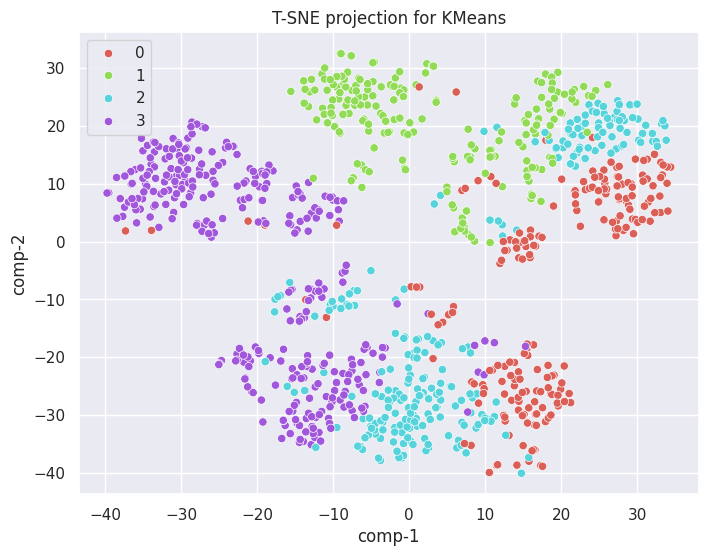

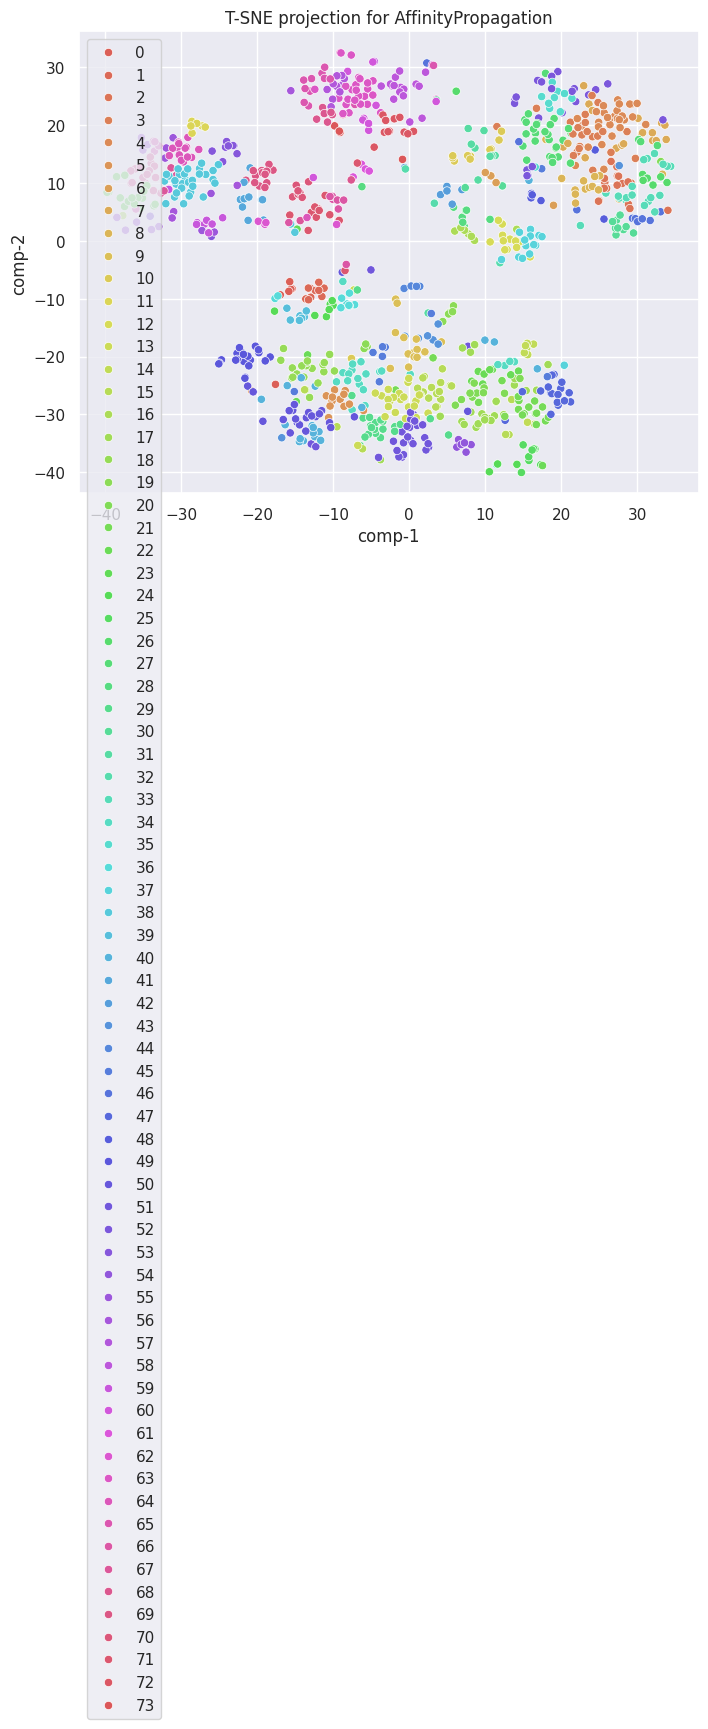

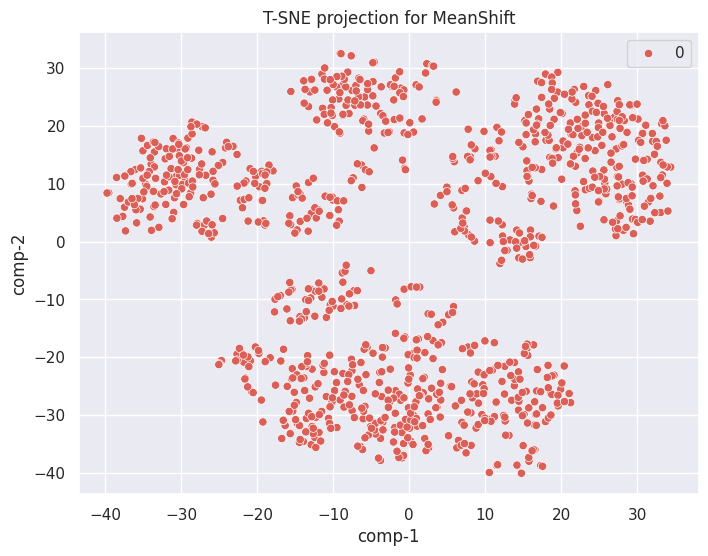

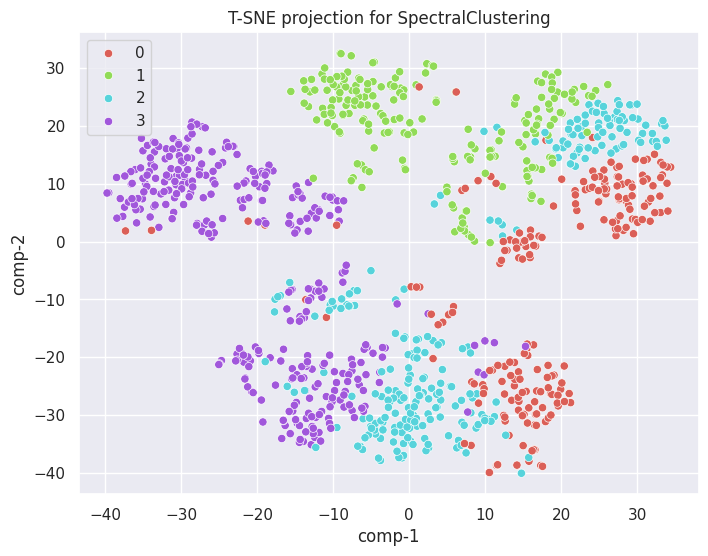

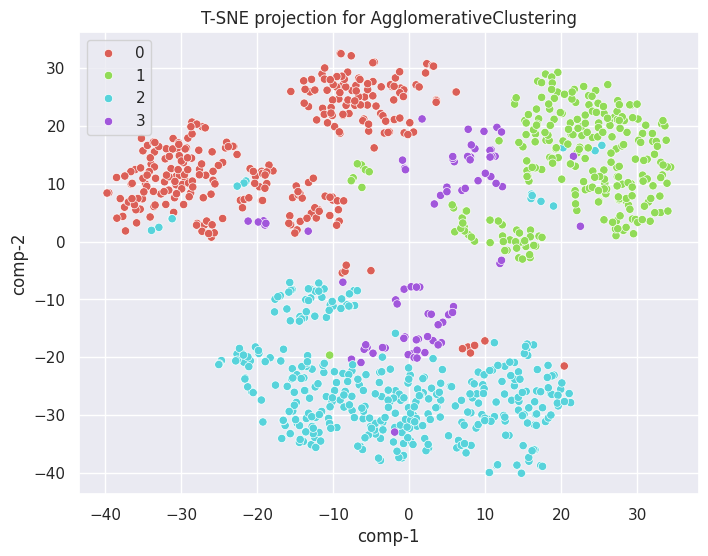

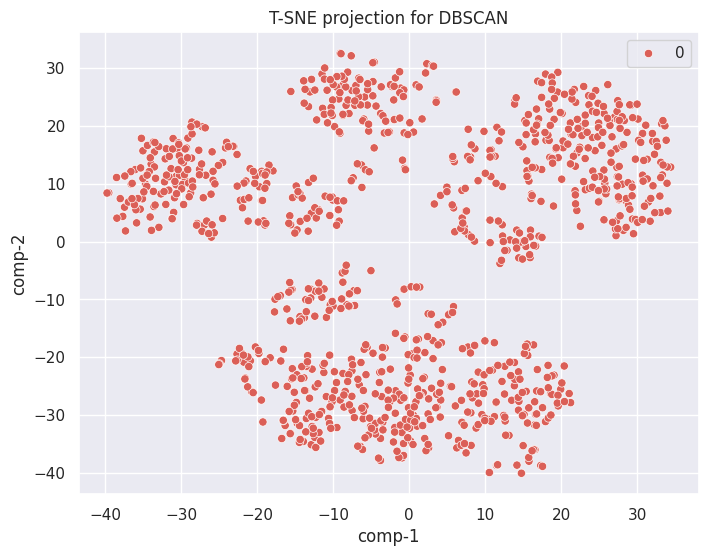

In [22]:
models = {
    "KMeans": kmeans,  # Assuming 'kmeans' is the last fitted KMeans model
    "AffinityPropagation": aff_prop,
    "MeanShift": ms,
    "SpectralClustering": kmeans, # Assuming 'kmeans' is the last fitted SpectralClustering model
    "AgglomerativeClustering": agg, # Assuming 'agg' is the last fitted AgglomerativeClustering model
    "DBSCAN": dbs # Assuming 'dbs' is the last fitted DBSCAN model
}

# Iterate through the models and generate t-SNE visualizations
for model_name, model in models.items():
    labels = model.labels_
    x_2d = TSNE(n_components=2, random_state=42).fit_transform(X)

    df_tsne = pd.DataFrame()
    df_tsne["y"] = labels  # Use the labels from the current model
    df_tsne["comp-1"] = x_2d[:, 0]
    df_tsne["comp-2"] = x_2d[:, 1]

    plt.figure(figsize=(8, 6)) # Adjust figure size if needed
    sns.scatterplot(
        x="comp-1",
        y="comp-2",
        hue=df_tsne.y.tolist(),
        palette=sns.color_palette("hls", len(np.unique(labels))), # Use appropriate number of colors
        data=df_tsne
    ).set(title=f"T-SNE projection for {model_name}")
    plt.show()
